## Perceptron binary classification with Iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing Iris.csv and renaming the columns
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 names = ['sepal_lenght','sepal_width','petal_lenght', 'petal_width', 'class'])

In [3]:
# Show data
df

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Slicing dataset, getting rid of Iris-virginica label
df = df[:100]
df

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


<Figure size 576x360 with 0 Axes>

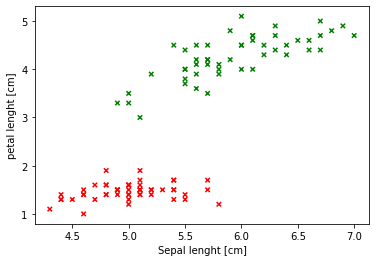

In [5]:
# Ploting the two groups of data classified by variety:
    # 'Iris-setosa': 'red'
    # 'Iris-versicolor': 'green'
plt.figure(figsize=(8,5))
df.plot(kind='scatter', x='sepal_lenght', y='petal_lenght', 
        color=np.where(df['class']=='Iris-setosa','r', 'g'),
        xlabel='Sepal lenght [cm]', ylabel='petal lenght [cm]', marker='x');

fname =  "Img/initial_data.png"
plt.savefig(fname, dpi=75, facecolor='w', transparent=False, format='png');


## Developing a perceptron model which can classify flowers
- We will be using 'sepal lenght' and 'petal lenght' as inputs
- We will expect the right 'class' as output
- The model activation function will be 'sigmoid(x)'
- Outputs will be between 0 and 1, so we have to convert 'class' to this codification

In [6]:
# Defining inputs
X = np.array([df['sepal_lenght'], df['petal_lenght']]).T
# Defining outputs. We will convert 'Iris-setosa' to 0 and 'Iris versicolor' to 1
y = np.array([df['class']]).T
y = np.where(y=='Iris-setosa',0,1)


### Perceptron:  
&nbsp;
<img src="perceptron.png"
     alt="Perceptron img"
     style="float: center; max-width: 60%;" /> &nbsp;
$$summation=(\sum_{n=1}^{n} x_{n}*w_{n})+b$$
$$activation= {\sigma(summation)} = z$$
$$error=y-z$$

&nbsp;  
&nbsp;
    
### Sigmoid function:  
&nbsp;
<img src="sigmoid.png"
     alt="Sigmoid img"
     style="float: center; max-width: 70%;" />  &nbsp;
<h4 style="text-align: center;"> Backpropagation: </h4>
$$confidence\_inverse=\sigma'(summation)$$
$$weighted\_error = error * confidence\_inverse$$
$$weights\mathrel{+}=X*weighted\_error*learning\_rate$$

In [7]:
class Perceptron:
    def __init__(self):
        pass
    
    def d_sigmoid(self,X):
        return self.sigmoid(X) * (1 - self.sigmoid(X))
    
    def sigmoid(self,X):
        return 1 / (1 + np.exp(-X))
    
    def predict(self,X):
        self.summation = np.dot(X, self.weights) + self.bias
        activation = self.sigmoid(self.summation)
        return activation
    
    def train(self,X,y,n_iter=5,learn_rate=0.1):
        # Defining weights and bias
        size = np.shape(X)[1]
        np.random.seed(111)
        # Since our output are not between -1 and 1 and we dont want to stop
        # the model to learn, we make an adjustment over it's weights
        div = X.max() 
        self.weights = (np.random.rand(1,size).T * 2 - 1) / div
        self.bias = (np.random.rand(1) * 2 - 1) / div
        # Saving historic weights and bias && historic error
        self.hist = np.concatenate((self.weights[:,0],self.bias),axis=0)
        self.hist_error = []
        # Model fitting
        for _ in range(n_iter):
            z = self.predict(X)
            error = y - z
            # Multipliying np.arrays like this: [a,b,c]*[d,e,f] = [a*d, b*e, c*f]
            weighted_error = error * self.d_sigmoid(self.summation)
            # Updating weights and bias
            self.weights += np.array([np.mean(X * weighted_error, axis=0)]).T * learn_rate
            self.bias += np.mean(weighted_error) * learn_rate
            # Storing historic
            new_data = np.concatenate((self.weights[:,0],self.bias),axis=0)
            self.hist = np.vstack((self.hist,new_data))
            self.hist_error.append(np.mean(error))


In [8]:
# Training the model 100 times with a learning factor of 0.2
perceptron = Perceptron()
# Training
iterations = 100
learning_rate = 0.3
perceptron.train(X,y,iterations,learning_rate)

### Plotting weight and error evolution

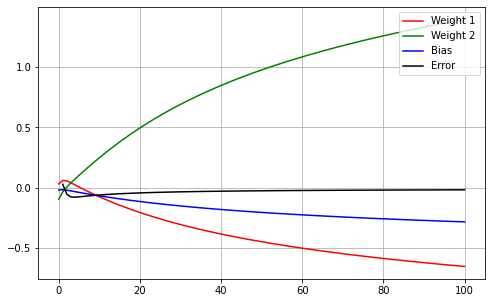

In [9]:
data = perceptron.hist
error = perceptron.hist_error
plt.figure(figsize=(8,5))
plt.plot(range(len(data)), data[:,0], color='r', label='Weight 1')
plt.plot(range(len(data)), data[:,1], color='g', label='Weight 2')
plt.plot(range(len(data)), data[:,2], color='blue', label='Bias')
plt.plot(range(1,len(error)+1), error, color='black', label='Error')
plt.grid(True)
plt.legend(loc='upper right')
plt.show();

### Visualizing desidion boundaries for two labels

In [10]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    # Meshgrid() + ravel() is the equivalent of 2 for loop to cover a 2D grid 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    # 2 times loop
    for idx, cl in enumerate(np.unique(y)):
        matches = np.where(y==cl)
        plt.scatter(x=X[matches[0], 0], y=X[matches[0], 1], alpha=0.8, c=colors[idx],
            marker=markers[idx],label=np.where(cl==0,'Setosa','Versicolor'), edgecolor='black')

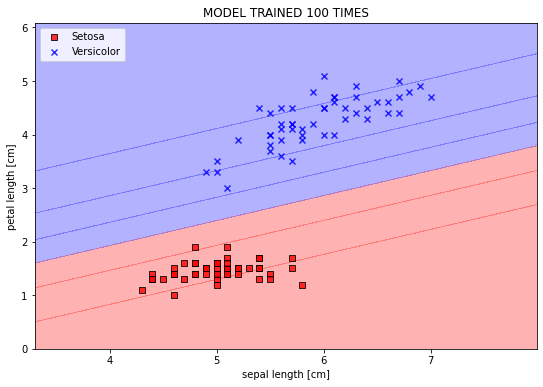

In [11]:
plt.figure(figsize=(9,6))
plot_decision_regions(X, y, classifier=perceptron, resolution=0.01)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('MODEL TRAINED '+ str(iterations) + ' TIMES')
plt.legend(loc='upper left');

### Evolution of desition boundaries
In a for loop that will run 'n' times we will do the following:  
- We will train the model 'Iterator_n' times
- We will save the output in a folder

In [12]:
perceptron2 = Perceptron()
for i in range(100):
    # Training perceptron 'i' times
    perceptron2.train(X,y,i,0.1)
    # Setting figure size
    fig = plt.figure(figsize=(12,8))
    # Creating decision plot for the model
    plot_decision_regions(X, y, classifier=perceptron2, resolution=0.01)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    fname =  'Img/plot/' + "{:03d}".format(i) + '.png'
    plt.savefig(fname, dpi=75, facecolor='w', transparent=False, format='png')
    # Closing figure in order not to display it
    plt.close(fig)